In [160]:
import turtle as t
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [ ]:
def line(x1,y1,x2,y2):
    t.up()
    t.goto(x1,y1)
    t.down()
    t.goto(x2,y2)
    return

def dotlist(seq1,seq2):
    for i in range(len(seq1)):
        t.up()
        t.goto(seq1[i],seq2[i])
        t.down()
        t.dot()

def count_in_circle(seq1,seq2,r):
    count = 0
    for i in range(len(seq1)):
        if seq1[i]**2 + seq2[i]**2 <= r**2:
            count += 1
    return count

def random_List(size,r):

    result = []
    for v in range(size):
        result.append(random.uniform(-r, r))
    return result

* 시각화

In [172]:
#샘플링
r = 100
n = 1000

x = random_List(n,r)
y = random_List(n,r)


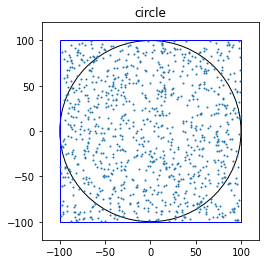

실제값:  31415.926535897932 , 추정치:  31760.0   n크기:  1000


In [181]:
#샘플링
r = 100
n = 1000

x = random_List(n,r)
y = random_List(n,r)



figure, axes = plt.subplots()
# axes.plot([-300,300],[-300,300])

draw_circle = plt.Circle((0, 0), 100,fill=False)
drow_reg = patches.Rectangle(
        (-100, -100),
        200,
        200,
        edgecolor = 'blue',
        facecolor = 'red',
        fill=False
     )


axes.set_aspect(1)
axes.add_artist(draw_circle)
axes.add_patch(drow_reg)
plt.scatter(x,y,s=1)
plt.title('circle')
plt.xlim([-120, 120])      # X축의 범위: [xmin, xmax]
plt.ylim([-120, 120])     # Y축의 범위: [ymin, ymax]


plt.show()

circle = math.pi*r**2
square = r*2*r*2
n_in_circle = count_in_circle(x,y,r)
e_circle = square*n_in_circle/n
print("실제값: ",circle,", 추정치: ",e_circle, "  n크기: ",n)

* n크기에 따른 추정치 비교

In [186]:
# 100개일경우 신뢰도가 많이 떨어짐
for i in [100,100,100,100,100,1000,10000]:
    r = 100
    n = i

    x = random_List(n,r)
    y = random_List(n,r)



    circle = math.pi*r**2
    square = r*2*r*2
    n_in_circle = count_in_circle(x,y,r)
    e_circle = square*n_in_circle/n
    print("실제값: ",circle,", 추정치: ",e_circle, "  n크기: ",n)

실제값:  31415.926535897932 , 추정치:  30400.0   n크기:  100
실제값:  31415.926535897932 , 추정치:  30400.0   n크기:  100
실제값:  31415.926535897932 , 추정치:  31600.0   n크기:  100
실제값:  31415.926535897932 , 추정치:  32000.0   n크기:  100
실제값:  31415.926535897932 , 추정치:  29200.0   n크기:  100
실제값:  31415.926535897932 , 추정치:  31160.0   n크기:  1000
실제값:  31415.926535897932 , 추정치:  31424.0   n크기:  10000


* 샘플에서 부트스트랩하여 넓이 신뢰구간 추정 확인
* 원래 샘플의 수에 따른 차이 분석

* 샘플수 100, 1000, 1000의 결과 모두 신뢰구간에 참값(31415......)을 포함한다.
* 샘플수 100인경우 신뢰구간이 넓음

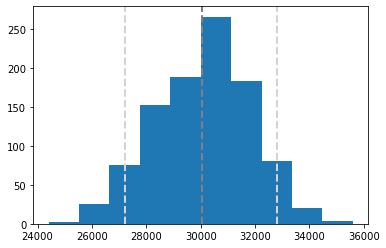

평균:  30041.2 , 신뢰구간_l:  27200.0   신뢰구간_u:  32800.0  원샘플수:  100


In [182]:
r = 100
n = 100
n_trial = 1000

x = random_List(n,r)
y = random_List(n,r)

circle = math.pi*r**2
square = r*2*r*2

xy = np.concatenate((np.array(x).reshape(-1,1),np.array(y).reshape(-1,1)),axis=1)
xy = list(xy)
results = []
for i in range(n_trial):
    count = 0
    for i in range(n):
        sampled_point = random.sample(xy, 1)
        sampled_point = np.array(sampled_point)[0]
        if sampled_point[0]**2 + sampled_point[1]**2 <= r**2: count += 1
    e_circle = square*count/n
    results.append(e_circle)

results.sort()

import matplotlib.pyplot as plt


mean = sum(results)/n_trial
lower_bound = results[round(n_trial*0.05)]
upper_bound = results[round(n_trial*0.95)]


plt.hist(results)
plt.axvline(lower_bound, color='lightgray', linestyle='--', linewidth=2)
plt.axvline(upper_bound, color='lightgray', linestyle='--', linewidth=2)
plt.axvline(mean, color='gray', linestyle='--', linewidth=2)

plt.show()

print("평균: ",mean,", 신뢰구간_l: ",lower_bound, "  신뢰구간_u: ",upper_bound, " 원샘플수: ",n)

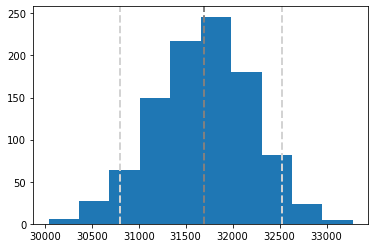

평균:  31690.24 , 신뢰구간_l:  30800.0   신뢰구간_u:  32520.0  원샘플수:  1000


In [151]:
r = 100
n = 1000
n_trial = 1000

x = random_List(n,r)
y = random_List(n,r)

circle = math.pi*r**2
square = r*2*r*2

xy = np.concatenate((np.array(x).reshape(-1,1),np.array(y).reshape(-1,1)),axis=1)
xy = list(xy)
results = []
for i in range(n_trial):
    count = 0
    for i in range(n):
        sampled_point = random.sample(xy, 1)
        sampled_point = np.array(sampled_point)[0]
        if sampled_point[0]**2 + sampled_point[1]**2 <= r**2: count += 1
    e_circle = square*count/n
    results.append(e_circle)

results.sort()

import matplotlib.pyplot as plt


mean = sum(results)/n_trial
lower_bound = results[round(n_trial*0.05)]
upper_bound = results[round(n_trial*0.95)]


plt.hist(results)
plt.axvline(lower_bound, color='lightgray', linestyle='--', linewidth=2)
plt.axvline(upper_bound, color='lightgray', linestyle='--', linewidth=2)
plt.axvline(mean, color='gray', linestyle='--', linewidth=2)

plt.show()

print("평균: ",mean,", 신뢰구간_l: ",lower_bound, "  신뢰구간_u: ",upper_bound, " 원샘플수: ",n)

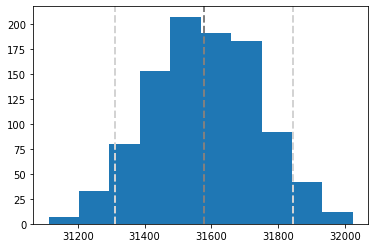

평균:  31578.54 , 신뢰구간_l:  31312.0   신뢰구간_u:  31844.0  원샘플수:  10000


In [147]:
r = 100
n = 10000
n_trial = 1000

x = random_List(n,r)
y = random_List(n,r)

circle = math.pi*r**2
square = r*2*r*2

xy = np.concatenate((np.array(x).reshape(-1,1),np.array(y).reshape(-1,1)),axis=1)
xy = list(xy)
results = []
for i in range(n_trial):
    count = 0
    for i in range(n):
        sampled_point = random.sample(xy, 1)
        sampled_point = np.array(sampled_point)[0]
        if sampled_point[0]**2 + sampled_point[1]**2 <= r**2: count += 1
    e_circle = square*count/n
    results.append(e_circle)

results.sort()

import matplotlib.pyplot as plt


mean = sum(results)/n_trial
lower_bound = results[round(n_trial*0.05)]
upper_bound = results[round(n_trial*0.95)]


plt.hist(results)
plt.axvline(lower_bound, color='lightgray', linestyle='--', linewidth=2)
plt.axvline(upper_bound, color='lightgray', linestyle='--', linewidth=2)
plt.axvline(mean, color='gray', linestyle='--', linewidth=2)

plt.show()

print("평균: ",mean,", 신뢰구간_l: ",lower_bound, "  신뢰구간_u: ",upper_bound, " 원샘플수: ",n)